In [1]:
# Imports
#---------
import sys
import pandas as pd
import numpy as np
import feather
import os
import gc
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from pandas.plotting import register_matplotlib_converters
import matplotlib.ticker as ticker
from matplotlib.ticker import FuncFormatter
from matplotlib.dates import DateFormatter, MonthLocator
import matplotlib as mpl
import seaborn as sns

register_matplotlib_converters()

# File locations
#----------------
the_gases = './oxaria/raw/1oxaria/json/gap_filling/batch_3_jun21_oct21/'
pngs = './oxaria/pngs/gap_filling/'



In [2]:
# Load the df 
#-------------
oxaria1_gases = pd.read_feather(the_gases+'oxaria1_gases_gf_oct.ftr').set_index(['tag','rec'])


In [3]:
oxaria1_gases.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6803221 entries, ('scs-bgx-536', Timestamp('2021-06-01 00:00:06+0000', tz='UTC')) to ('scs-bgx-543', Timestamp('2021-09-30 23:59:58+0000', tz='UTC'))
Data columns (total 21 columns):
 #   Column            Dtype  
---  ------            -----  
 0   val.no2.wev       float32
 1   val.no2.cnc       float32
 2   val.no2.aev       float32
 3   val.no2.wec       float32
 4   val.ox.wev        float32
 5   val.ox.cnc        float32
 6   val.ox.aev        float32
 7   val.ox.wec        float32
 8   val.no.wev        float32
 9   val.no.cnc        float32
 10  val.no.aev        float32
 11  val.no.wec        float32
 12  val.co.wev        float32
 13  val.co.cnc        float32
 14  val.co.aev        float32
 15  val.co.wec        float32
 16  val.sht.hmd       float32
 17  val.sht.tmp       float32
 18  exg.vb20.no2.cnc  float32
 19  insert_date       object 
 20  name              object 
dtypes: float32(19), object(2)
memory usage: 804.4+ MB

In [5]:
oxaria1_gases.iloc[:, [1, 20]]

val.no2.cnc            name
tag         rec                                                   
scs-bgx-536 2021-06-01 00:00:06+00:00 -1884.800049         High St
            2021-06-01 00:00:16+00:00 -1885.099976         High St
            2021-06-01 00:00:26+00:00 -1885.500000         High St
            2021-06-01 00:00:36+00:00 -1885.500000         High St
            2021-06-01 00:00:46+00:00 -1885.900024         High St
...                                            ...             ...
scs-bgx-543 2021-09-30 23:59:18+00:00    31.200001  John Radcliffe
            2021-09-30 23:59:28+00:00    32.099998  John Radcliffe
            2021-09-30 23:59:38+00:00    31.500000  John Radcliffe
            2021-09-30 23:59:48+00:00    31.200001  John Radcliffe
            2021-09-30 23:59:58+00:00    31.700001  John Radcliffe

[6803221 rows x 2 columns]

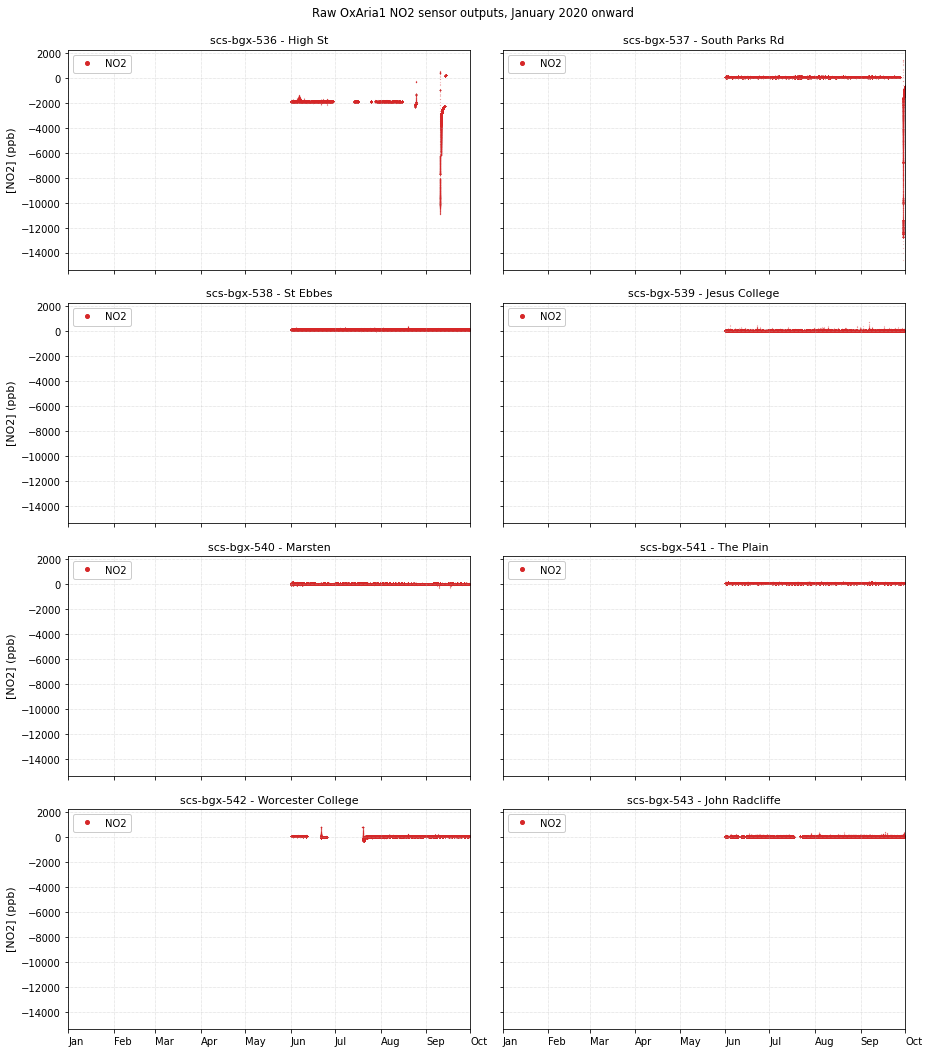

In [9]:
# NO2

df = oxaria1_gases.iloc[:, [1, 20]]

plt.style.use('fast')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2021,1,1)
end_date=dt.datetime(2021,10,1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=True, sharey=True, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 NO2 sensor outputs, January 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = list(dat['name'].unique())[0]
    dat.plot(y='val.no2.cnc', c='tab:red',linewidth=0.5, marker='o', ms=0.1, ls='', label='NO2', ax=ax, legend=True, \
            zorder=1)
    ax.set_title(''.join(tag+' - '+t_name), fontsize=11)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=10
        )
    ax.tick_params(axis='y', labelsize=10)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    #ax.set_ylim(-200, 200)
    ax.set_ylabel('[NO2] (ppb)', fontsize=11)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.08, hspace=0.15)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left') 
    ax.grid(True,ls=':',lw=0.5)
    
#plt.savefig(pngs+'oxaria1_no2_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()


In [8]:
import pytz

mar = dt.datetime(2020, 3, 1, 0, 0, 0, tzinfo=pytz.utc)
jan = dt.datetime(2021, 1, 1, 0, 0, 0, tzinfo=pytz.utc) 

df = oxaria1_gases.query('tag in ["scs-bgx-538","scs-bgx-539","scs-bgx-541"]')
df = df.query('@mar < rec < @jan').reset_index()

sebbes = pd.read_feather(
    './oxaria/raw/0oxaria/auto_merged_ratified.ftr'
).set_index('rec').sort_index().query('sitecode_s == "OX8"')

In [9]:
sebbes


,sitecode_s,name_s,no_ppb_s,no2_ppb_s,pm10_ugg_s,o3_ppb_s,pm25_ugg_s,fidas_t_s,fidas_rh_s,sitecode_h,name_h,no_ppb_h,no2_ppb_h,pm10_ugg_h,o3_ppb_h,pm25_ugg_h,fidas_t_h,fidas_rh_h,abs_no2_diff,abs_pm10_diff
rec,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:15:00+00:00,OX8,Oxford St Ebbes,0.67,12.28,36.299999,15.73,29.056700,6.2,91.500000,OX6,Oxford High St,3.37,14.360000,47.400002,NaN,NaN,NaN,NaN,2.080000,11.100002
2020-01-01 00:30:00+00:00,OX8,Oxford St Ebbes,0.86,12.76,38.700001,13.41,33.113300,6.1,92.000000,OX6,Oxford High St,6.23,16.760000,47.700001,NaN,NaN,NaN,NaN,4.000000,9.000000
2020-01-01 00:45:00+00:00,OX8,Oxford St Ebbes,0.67,12.95,40.700001,10.52,35.000099,6.1,91.900002,OX6,Oxford High St,7.56,18.070000,35.799999,NaN,NaN,NaN,NaN,5.120000,4.900002
2020-01-01 01:00:00+00:00,OX8,Oxford St Ebbes,NaN,NaN,36.099998,9.17,30.660500,6.1,91.099998,OX6,Oxford High St,NaN,NaN,32.799999,NaN,NaN,NaN,NaN,NaN,3.299999
2020-01-01 01:15:00+00:00,OX8,Oxford St Ebbes,NaN,NaN,36.900002,8.78,31.415199,5.9,90.699997,OX6,Oxford High St,NaN,NaN,32.400002,NaN,NaN,NaN,NaN,NaN,4.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 23:00:00+00:00,OX8,Oxford St Ebbes,1.55,12.96,13.700000,3.85,12.735900,-2.7,100.000000,OX6,Oxford High St,11.29,20.480000,14.800000,NaN,NaN,NaN,NaN,7.520000,1.100000
2020-12-31 23:15:00+00:00,OX8,Oxford St Ebbes,0.62,13.38,13.800000,4.04,12.924600,-3.1,100.000000,OX6,Oxford High St,11.81,20.059999,16.900000,NaN,NaN,NaN,NaN,6.679999,3.099999
2020-12-31 23:30:00+00:00,OX8,Oxford St Ebbes,0.62,12.66,14.300000,3.75,13.396300,-3.2,100.000000,OX6,Oxford High St,9.30,19.850000,14.000000,NaN,NaN,NaN,NaN,7.190001,0.300000


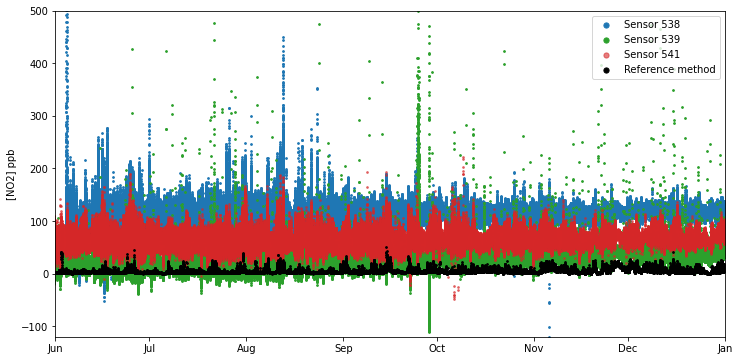

In [10]:
plt.style.use('fast')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 6, 1)
end_date = dt.datetime(2021, 1, 1)

f, (ax1) = plt.subplots(1, 1, figsize=(12, 6))
ax1.scatter(x='rec',
            y='val.no2.cnc',
            data=df.query('tag == "scs-bgx-538"').dropna(),
            marker='o',
            s=3,
            label='Sensor 538',
            c='tab:blue')
ax1.scatter(x='rec',
            y='val.no2.cnc',
            data=df.query('tag == "scs-bgx-539"').dropna(),
            marker='o',
            s=3,
            label='Sensor 539',
            c='tab:green')
ax1.scatter(x='rec',
            y='val.no2.cnc',
            data=df.query('tag == "scs-bgx-541"').dropna(),
            marker='o',
            s=3,
            label='Sensor 541',
            c='tab:red',
            alpha=0.6)
ax1.scatter(x='rec',
            y='no2_ppb_s',
            data=sebbes.reset_index(),
            marker='o',
            s=3,
            label='Reference method',
            c='k')

#ax1.tick_params(
#    axis='x',
#    which='major',
#    labelrotation=0,
#    labelsize=8
#    )
#ax1.tick_params(axis='y', labelsize=9)
#ax1.tick_params(axis='x', which='minor', length=0)
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(7))
#ax1.xaxis.set_major_formatter(myFmt)
#plt.setp(ax1.xaxis.get_majorticklabels(), ha='center')
ax1.set_ylabel('[NO2] ppb')
ax1.set_ylim(-120,500)
ax1.set_xlim(start_date,end_date)
ax1.xaxis.set_major_locator(MonthLocator())
ax1.xaxis.set_major_formatter(myFmt)

ax1.legend(markerscale=4,
           frameon=True,
           framealpha=0.99,
           loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.legend(loc='upper right',markerscale=3)
plt.savefig('./oxaria/pngs/gap_filling/paper_fig1_ts.png')
plt.show()

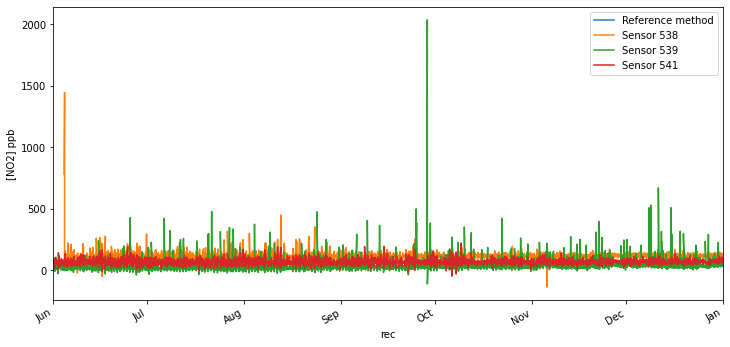

In [11]:
plt.style.use('fast')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 6, 1)
end_date = dt.datetime(2021, 1, 1)

f, (ax1) = plt.subplots(1, 1, figsize=(12, 6))
sebbes.reset_index().dropna().sort_values(by='rec').plot(
    x='rec',
    y='no2_ppb_s',
    marker='',
    label='Reference method',
    ax=ax1,
    zorder=1)
df.query('tag == "scs-bgx-538"').dropna().sort_values(by='rec').plot(
    x='rec', y='val.no2.cnc', marker='', label='Sensor 538', ax=ax1)
df.query('tag == "scs-bgx-539"').dropna().sort_values(by='rec').plot(
    x='rec', y='val.no2.cnc', marker='', label='Sensor 539', ax=ax1)
df.query('tag == "scs-bgx-541"').dropna().sort_values(by='rec').plot(
    x='rec', y='val.no2.cnc', marker='', label='Sensor 541', ax=ax1)

#ax1.tick_params(
#    axis='x',
#    which='major',
#    labelrotation=0,
#    labelsize=8
#    )
#ax1.tick_params(axis='y', labelsize=9)
#ax1.tick_params(axis='x', which='minor', length=0)
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(7))
#ax1.xaxis.set_major_formatter(myFmt)
#plt.setp(ax1.xaxis.get_majorticklabels(), ha='center')
ax1.set_ylabel('[NO2] ppb')
#ax1.set_ylim(-120,500)
ax1.set_xlim(start_date, end_date)
ax1.xaxis.set_major_locator(MonthLocator())
ax1.xaxis.set_major_formatter(myFmt)

ax1.legend(markerscale=4,
           frameon=True,
           framealpha=0.99,
           loc='center left',
           bbox_to_anchor=(1, 0.5))

plt.legend(loc='upper right', markerscale=3)
plt.savefig(
    './oxaria/pngs/gap_filling/paper_fig1_ts.png'
)
plt.show()

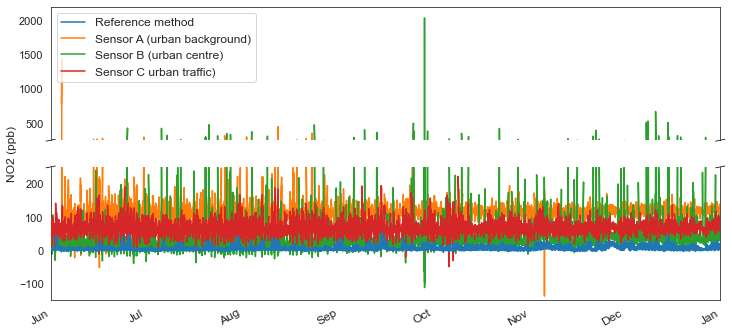

In [12]:
# Plotting the verification results using December 2020 data - split
#--------------------------------------------------------------------

myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 6, 1)
end_date = dt.datetime(2021, 1, 1)

sns.set_style("white", {'axes.grid' : False})

myFmt = mdates.DateFormatter('%b')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True,figsize=(12,6))

#df = val_y.reset_index()

sebbes.reset_index().dropna(subset=['no2_ppb_s']).sort_values(by='rec').plot(
    x='rec',
    y='no2_ppb_s',
    marker='',
    label='Reference method',
    ax=ax1,
    zorder=10)
df.query('tag == "scs-bgx-538"').dropna().sort_values(by='rec').plot(
    x='rec', y='val.no2.cnc', marker='', label='Sensor A (urban background)', ax=ax1,zorder=1)
df.query('tag == "scs-bgx-539"').dropna().sort_values(by='rec').plot(
    x='rec', y='val.no2.cnc', marker='', label='Sensor B (urban centre)', ax=ax1,zorder=2)
df.query('tag == "scs-bgx-541"').dropna().sort_values(by='rec').plot(
    x='rec', y='val.no2.cnc', marker='', label='Sensor C urban traffic)', ax=ax1,zorder=3)

sebbes.reset_index().dropna(subset=['no2_ppb_s']).sort_values(by='rec').plot(
    x='rec',
    y='no2_ppb_s',
    marker='',
    lw=3,
    ax=ax2,
    zorder=10, 
    legend=None)
df.query('tag == "scs-bgx-538"').dropna().sort_values(by='rec').plot(
    x='rec', y='val.no2.cnc', marker='', ax=ax2, legend=None,zorder=1)
df.query('tag == "scs-bgx-539"').dropna().sort_values(by='rec').plot(
    x='rec', y='val.no2.cnc', marker='', ax=ax2, legend=None,zorder=2)
df.query('tag == "scs-bgx-541"').dropna().sort_values(by='rec').plot(
    x='rec', y='val.no2.cnc', marker='', ax=ax2, legend=None,zorder=3)

# zoom-in / limit the view to different portions of the data
ax1.set_ylim(250,2200)  # outliers only
ax2.set_ylim(-150,250)  # most of the data
ax1.set_xlim(start_date, end_date)
ax2.set_xlim(start_date, end_date)
# hide the spines between ax and ax2
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.set_ticks_position('none')
ax2.yaxis.set_label_coords(-0.05,1.1)
ax1.yaxis.label.set_visible(False)

d = .007  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax1.transAxes, color='k', clip_on=False, lw=0.75)
ax1.plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
ax1.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal
ax2.xaxis.set_major_formatter(myFmt)
kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

#f.subplots_adjust(hspace=0.05)
plt.xlabel('', fontsize=12)
plt.ylabel('NO2 (ppb)', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
#ax1.set_title('Sensor & AURN reference PM10 timeseries, St Ebbes 2020. (<= 3,000 nodes) 356\n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax1.tick_params(axis="y", labelsize=11)
ax2.tick_params(axis="y", labelsize=11)

plt.savefig('./oxaria/pngs/gap_filling/paper_fig1_ts.png', dpi=300)
plt.show()


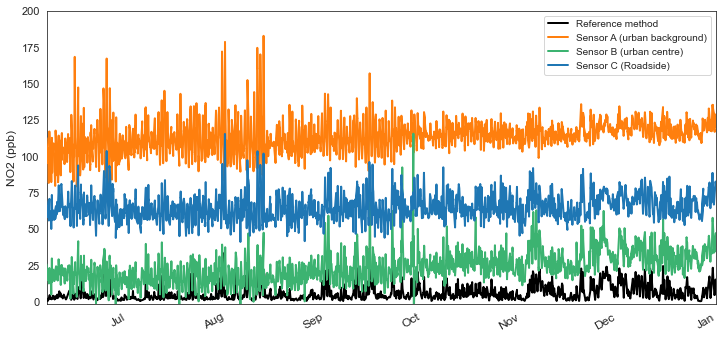

In [17]:
# Plotting the verification results using December 2020 data - split
# --------------------------------------------------------------------

myFmt = mdates.DateFormatter('%b')
start_date = dt.datetime(2020, 6, 6)
end_date = dt.datetime(2021, 1, 1)

sns.set_style("white", {'axes.grid': False})

myFmt = mdates.DateFormatter('%b')

f, ax2 = plt.subplots(1, 1, sharex=False, figsize=(12, 6))

#df = val_y.reset_index()

sebbes.reset_index().dropna(subset=['no2_ppb_s']).sort_values(by='rec').rolling(
    '3H', on='rec').mean().plot(x='rec',
                                y='no2_ppb_s',
                                c='k',
                                marker='',
                                ms=1,
                                ls='-',
                                lw=2,
                                label='Reference method',
                                ax=ax2,
                                # legend=True,
                                zorder=10)
df.query('tag == "scs-bgx-538"').dropna().sort_values(by='rec').rolling(
    '3H', on='rec').mean().plot(x='rec',
                                y='val.no2.cnc',
                                c='tab:orange',
                                marker='',
                                ms=2,
                                ls='-',
                                lw=2,
                                label='Sensor A (urban background)',
                                ax=ax2,
                                # legend=True,
                                zorder=10)
df.query('tag == "scs-bgx-539"').dropna().sort_values(by='rec').rolling(
    '3H', on='rec').mean().plot(x='rec',
                                y='val.no2.cnc',
                                c='mediumseagreen',
                                marker='',
                                ms=1,
                                ls='-',
                                lw=2,
                                label='Sensor B (urban centre)',
                                ax=ax2,
                                # legend=True,
                                zorder=10)
df.query('tag == "scs-bgx-541"').dropna().sort_values(by='rec').rolling(
    '3H', on='rec').mean().plot(x='rec',
                                y='val.no2.cnc',
                                c='tab:blue',
                                marker='',
                                ms=1,
                                ls='-',
                                lw=2,
                                label='Sensor C (Roadside)',
                                ax=ax2,
                                # legend=True,
                                zorder=10)
# zoom-in / limit the view to different portions of the data

ax2.set_xlim(start_date, end_date)
ax2.set_ylim(-2, 200)

# What's cool about this is that now if we vary the distance between
# ax and ax2 via f.subplots_adjust(hspace=...) or plt.subplot_tool(),
# the diagonal lines will move accordingly, and stay right at the tips
# of the spines they are 'breaking'

# f.subplots_adjust(hspace=0.05)
plt.xlabel('', fontsize=12)
plt.ylabel('NO2 (ppb)', fontsize=12)
ax1.legend(loc='upper left', fontsize=12)
#ax1.set_title('Sensor & AURN reference PM10 timeseries, St Ebbes 2020. (<= 3,000 nodes) 356\n', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax2.tick_params(axis="y", labelsize=11)
ax2.xaxis.set_major_locator(MonthLocator())
ax2.xaxis.set_major_formatter(myFmt)

plt.savefig(
    './oxaria/pngs/gap_filling/paper_fig1.1_ts.png', dpi=300)
plt.show()

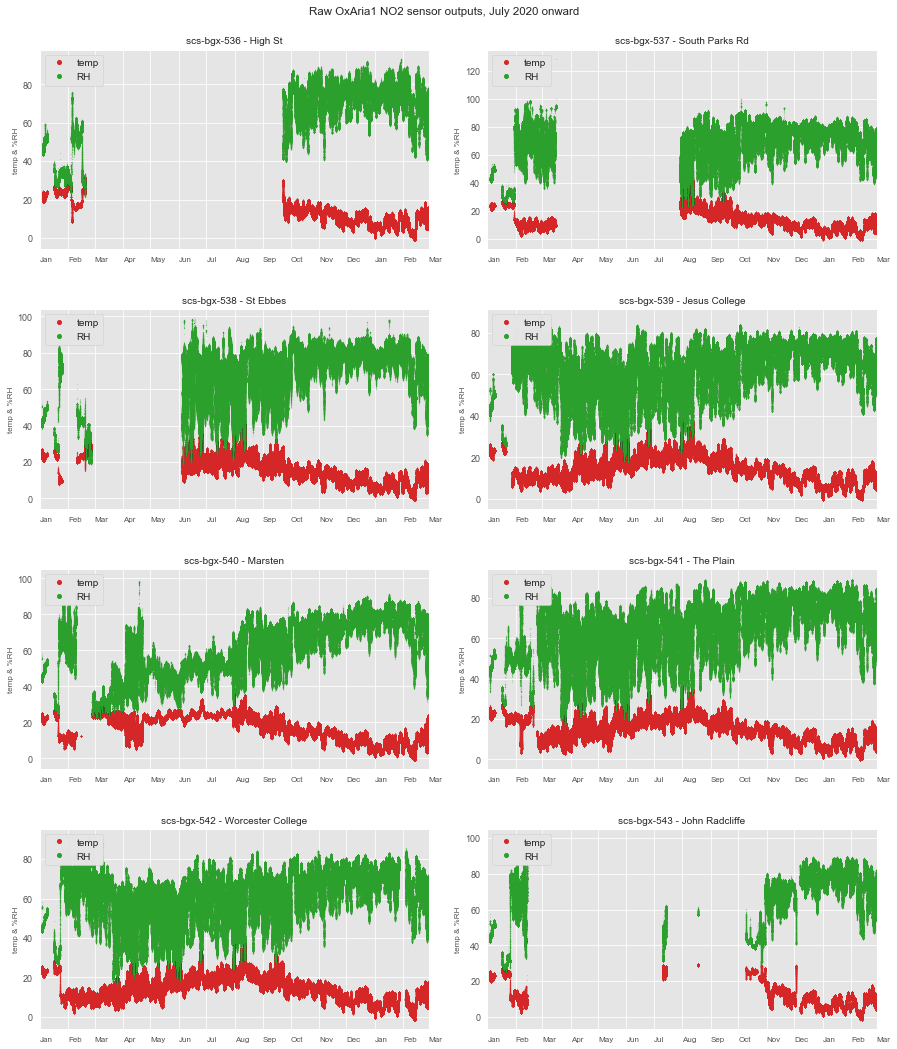

In [15]:
# Loop through plots with a log scale to compare time series & size fractions

df = oxaria1_gases.iloc[:, [16,17,19]]


plt.style.use('ggplot')
#plt.tight_layout()
myFmt = mdates.DateFormatter('%b')
start_date=dt.datetime(2020,1,1)
end_date=dt.datetime(2021,3,1)

fig, axes = plt.subplots(nrows=4, ncols=2, sharex=False, sharey=False, figsize=(15,20))
axes_list = [item for sublist in axes for item in sublist] 

fig.suptitle('Raw OxAria1 NO2 sensor outputs, July 2020 onward', fontsize=11.5, y=0.91)

for tag, dat in df.groupby('tag'):
    ax = axes_list.pop(0)
    dat.reset_index(level=0,inplace=True)
    t_name = list(dat['name'].unique())[0]
    dat.plot(y='val.sht.tmp', c='tab:red',linewidth=0.5, marker='o', ms=0.1, ls='', label='temp', ax=ax, \
             legend=True,zorder=1)
    dat.plot(y='val.sht.hmd', c='tab:green',linewidth=0.5, marker='o', ms=0.1, ls='', label='RH', ax=ax, \
             legend=True,zorder=1)    
    ax.set_title(''.join(tag+' - '+t_name), fontsize=10)
    ax.tick_params(
        axis='x',
        which='major',
        labelrotation=0,
        labelsize=8
        )
    ax.tick_params(axis='y', labelsize=9)
    ax.tick_params(axis='x', which='minor', bottom=False)
    ax.xaxis.set_major_locator(MonthLocator())
    ax.xaxis.set_major_formatter(myFmt)
    plt.setp(ax.xaxis.get_majorticklabels(), ha='left')
    ax.set_xlim(start_date, end_date)
    ax.set_ylabel('temp & %RH', fontsize=8)
    ax.set_xlabel('')
    plt.subplots_adjust(wspace=0.15, hspace=0.3)
    ax.legend(markerscale=40, frameon=True, framealpha=0.99, loc='upper left') 
    
plt.savefig(pngs+'oxaria2_no2_raw_sensor_ts.png')
plt.show()    
    
for ax in axes_list:
    ax.remove()


In [16]:
autos = pd.read_feather(
    './oxaria/processed/aurn/ox_auto_no2_pm_2019_2020_15m_last.ftr'
)

highst = autos.query('sitecode == "OX6"')

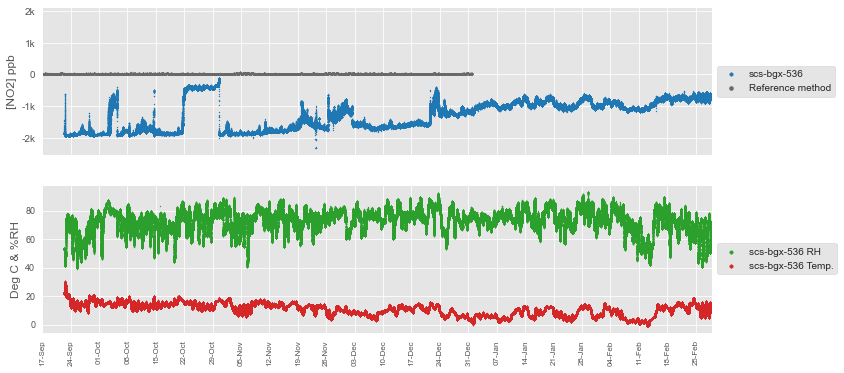

In [17]:
# Individual plot for High St which is not behaving well
#--------------------------------------------------------

start_date=dt.datetime(2020,9,17)
end_date=dt.datetime(2021,3,1)

data = oxaria1_gases.query('tag == "scs-bgx-536"').reset_index()

plt.style.use('ggplot')
myFmt = mdates.DateFormatter('%d-%b')

def y_fmt(y, pos):
    decades = [1e9, 1e6, 1e3, 1e0, 1e-3, 1e-6, 1e-9 ]
    suffix  = ["G", "M", "k", "" , "m" , "u", "n"  ]
    if y == 0:
        return str(0)
    for i, d in enumerate(decades):
        if np.abs(y) >=d:
            val = y/float(d)
            signf = len(str(val).split(".")[1])
            if signf == 0:
                return '{val:d}{suffix}'.format(val=int(val), suffix=suffix[i])
            else:
                if signf == 1:
                    #print(val, signf)
                    if str(val).split(".")[1] == "0":
                       return '{val:d}{suffix}'.format(val=int(round(val)), suffix=suffix[i]) 
                tx = "{"+"val:.{signf}f".format(signf = signf)+"}{suffix}"
                return tx.format(val=val, suffix=suffix[i])
    return y

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(12,6))
ax1.scatter(x='rec',y='val.no2.cnc',data=data,marker='.',s=3,label='scs-bgx-536',c='tab:blue');
ax1.scatter(x='rec',y='no2_ppb',data=highst,marker='.',s=4,label='Reference method',c='dimgrey');
ax2.scatter(x='rec',y='val.sht.hmd',data=data,marker='.',s=3,label='scs-bgx-536 RH',c='tab:green');
ax2.scatter(x='rec',y='val.sht.tmp',data=data,marker='.',s=3,label='scs-bgx-536 Temp.',c='tab:red');

ax2.tick_params(
    axis='x',
    which='major',
    labelrotation=90,
    labelsize=8
    )
ax2.tick_params(axis='y', labelsize=9)
ax2.tick_params(axis='x', which='minor', bottom=False)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(7))
ax2.xaxis.set_major_formatter(myFmt)
ax1.yaxis.set_major_formatter(FuncFormatter(y_fmt))
plt.setp(ax2.xaxis.get_majorticklabels(), ha='center')
ax1.set_ylabel('[NO2] ppb')
ax2.set_ylabel('Deg C & %RH')
ax2.set_xlim(start_date, end_date)

ax1.legend(markerscale=4, frameon=True, framealpha=0.99, loc='center left', bbox_to_anchor=(1, 0.5)); 
ax2.legend(markerscale=4, frameon=True, framealpha=0.99, loc='center left', bbox_to_anchor=(1, 0.5));

#plt.savefig(pngs+'highst_no2_raw_sensor_ts.png');
plt.show()  ;  
    